In [90]:
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw


In [208]:
def showImage(image):
    plt.imshow(image, extent=[0,2000,700,0])
    
def originalImageOpen(PATH):
    image = Image.open(PATH)
    plt.imshow(image)

def imOpen(PATH):
    originalImage = Image.open(PATH)
    image = originalImage.copy()
    for i in range (0, image.size[0]):
        for j in range (0, image.size[1]):
            r, g, b = image.getpixel((i,j))
            grayPixel = (0.3 * r) + (0.59 * g) + (0.11 * b)
            grayPixel = int(grayPixel)
            image.putpixel((i,j),(grayPixel, grayPixel, grayPixel))
    return image

def toStrH(image):
    rowWiseRunLengthCode = "H" + " " + str(image.size[0]) + " " + str(image.size[1]) 
    firstTime = True
    iOut = 0
    for j in range (0, image.size[1]):
        rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut) + "\n"
        firstTime = True
        for i in range (0, image.size[0]-1):
            iOut = i
            if(firstTime):
                firstTime = False
                newr, newg, newb = image.getpixel((i,j))
                r, g, b = newr, newg, newb
                rowWiseRunLengthCode = rowWiseRunLengthCode + str(r) + " " + str(i) + " "
            else:
                newr, newg, newb = image.getpixel((i,j))
                if(newr != r):
                    r, g, b = newr, newg, newb
                    rowWiseRunLengthCode = rowWiseRunLengthCode + str(i-1) + " " + str(r) + " " + str(i) + " "
    rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut)
    return rowWiseRunLengthCode

def toStrV(image):
    rowWiseRunLengthCode = "V" + " " + str(image.size[0]) + " " + str(image.size[1]) 
    firstTime = True
    jOut = 0
    for i in range (0, image.size[0]):
        rowWiseRunLengthCode = rowWiseRunLengthCode + str(jOut) + "\n"
        firstTime = True
        for j in range (0, image.size[1]-1):
            jOut = j
            if(firstTime):
                firstTime = False
                newr, newg, newb = image.getpixel((i,j))
                r, g, b = newr, newg, newb
                rowWiseRunLengthCode = rowWiseRunLengthCode + str(r) + " " + str(j) + " "
            else:
                newr, newg, newb = image.getpixel((i,j))
                if(newr != r):
                    r, g, b = newr, newg, newb
                    rowWiseRunLengthCode = rowWiseRunLengthCode + str(j-1) + " " + str(j) + " " + str(j) + " "
    rowWiseRunLengthCode = rowWiseRunLengthCode + str(jOut)
    return rowWiseRunLengthCode
    
def toFile(name, runLengthCode):
    path = 'F:/GUC/Computer Vision/' + name
    file = open(path, 'w+')
    file.write(runLengthCode)
    file.close()
    
def toImg(path):
    file = open(path, 'r')
    lines = file.readlines()
    values = lines[0].split()
    image = Image.new('RGB',(int(values[1]),int(values[2])))
    rltype = ""
    firstLine = True
    index = 0;
    for j in lines:
        values = lines[index].split()
        if(lines[0][0]=='H'and (firstLine)):
            image = Image.new('RGB',(int(values[1]),int(values[2])))
            rltype = 'H'
        if(lines[0][0]=='V'and (firstLine)):
            image = Image.new('RGB',(int(values[1]),int(values[2])))
            rltype = 'V'
        if(rltype=='H' and not(firstLine)):
            i = 0
            while i<(len(values)-3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                color = int(color)
                start = int(start)
                end = int(end)
                while start<(end+1):
                    image.putpixel((start,index),(color, color, color))
                    start = start + 1 
                i = i+3
        if(rltype=='V' and not(firstLine)):
            i = 0
            while i<(len(values)/3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                while start<(end+1):
                    image.putpixel((index,start),(color, color, color))
                    start = start + 1 
                i = i+3
        index = index + 1
        firstLine = False
    return image

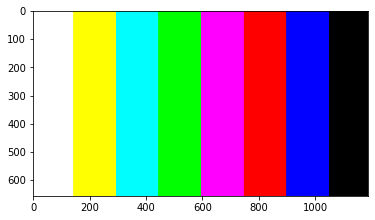

In [209]:
originalImageOpen('F:/GUC/Computer Vision/bars.bmp')

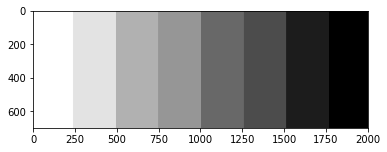

In [210]:
greyScaleImage = imOpen('F:/GUC/Computer Vision/bars.bmp')
showImage(greyScaleImage)

In [120]:
rowWiseRunLengthCode = toStrH(greyScaleImage)

In [121]:
columnWiseRunLengthCode = toStrV(greyScaleImage)

In [80]:
print(rowWiseRunLengthCode)

 H 1188 6560
 row0:255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747 747 77 748 748 76 749 895 77 896 896 75 897 897 33 898 898 29 899 899 28 900 1047 26 1048 1048 4 1049 1049 0 1050 1186
 row1:255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747 747 77 748 748 76 749 895 77 896 896 75 897 897 33 898 898 29 899 899 28 900 1047 26 1048 1048 4 1049 1049 0 1050 1186
 row2:255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747

In [81]:
print(columnWiseRunLengthCode)

 V 1188 6560
 column0:255 0 654
 column1:255 0 654
 column2:255 0 654
 column3:255 0 654
 column4:255 0 654
 column5:255 0 654
 column6:255 0 654
 column7:255 0 654
 column8:255 0 654
 column9:255 0 654
 column10:255 0 654
 column11:255 0 654
 column12:255 0 654
 column13:255 0 654
 column14:255 0 654
 column15:255 0 654
 column16:255 0 654
 column17:255 0 654
 column18:255 0 654
 column19:255 0 654
 column20:255 0 654
 column21:255 0 654
 column22:255 0 654
 column23:255 0 654
 column24:255 0 654
 column25:255 0 654
 column26:255 0 654
 column27:255 0 654
 column28:255 0 654
 column29:255 0 654
 column30:255 0 654
 column31:255 0 654
 column32:255 0 654
 column33:255 0 654
 column34:255 0 654
 column35:255 0 654
 column36:255 0 654
 column37:255 0 654
 column38:255 0 654
 column39:255 0 654
 column40:255 0 654
 column41:255 0 654
 column42:255 0 654
 column43:255 0 654
 column44:255 0 654
 column45:255 0 654
 column46:255 0 654
 column47:255 0 654
 column48:255 0 654
 column49:255 0 6

In [122]:
toFile("rowWiseRunLengthCode.txt", rowWiseRunLengthCode)
toFile("columnWiseRunLengthCode.txt", columnWiseRunLengthCode)

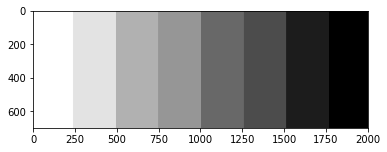

In [211]:
showImage(greyScaleImage)

(4, 4, 4)


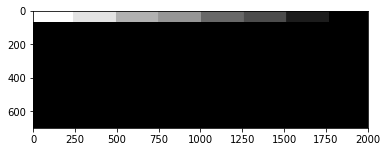

In [224]:
image = toImg("F:/GUC/Computer Vision/rowWiseRunLengthCode.txt")
showImage(image)
print(image.getpixel((1049,459)))